In [1]:
using LinearAlgebra
using Plots
using CSV, DataFrames

In [16]:
function shift_rotate(x, y, θ, x_shift, y_shift, θ_shift)
    v = [x - x_shift, y-y_shift]
    R = [cos(θ_shift) sin(θ_shift); -sin(θ_shift) cos(θ_shift)]
    vf = R*v
    return vf[1], vf[2], (θ - θ_shift)
end

shift_rotate (generic function with 2 methods)

In [26]:
additional = CSV.read("./twoCarsDataFar.csv", DataFrame)
dataP = additional[:, [:xP, :yP, :thetaP, :xE, :yE, :thetaE, :inputP]]
dataE = additional[:, [:xP, :yP, :thetaP, :xE, :yE, :thetaE, :inputE]]
dataP.inputP = Int.(round.(dataP.inputP))
dataE.inputE = Int.(round.(dataE.inputE))

# Transform dataP to pursuer's frame of reference
N = length(dataP.inputP)
for i=1:N
    dataP.xE[i], dataP.yE[i], dataP.thetaE[i] = shift_rotate(dataP.xE[i], dataP.yE[i], dataP.thetaE[i], dataP.xP[i], dataP.yP[i], dataP.thetaP[i])
    dataP.xP[i] = 0
    dataP.yP[i] = 0
    dataP.thetaP[i] = 0
end

# Transform dataE to evader's frame of reference
for i=1:N
    dataE.xP[i], dataE.yP[i], dataE.thetaP[i] = shift_rotate(dataE.xP[i], dataE.yP[i], dataE.thetaP[i], dataE.xE[i], dataE.yE[i], dataE.thetaE[i])
    dataE.xE[i] = 0
    dataE.yE[i] = 0
    dataE.thetaE[i] = 0
end

,xP,yP,thetaP,inputP,xE,yE,thetaE,inputE
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.0,0.0,0.0,0.999944,9.0,9.0,1.5708,-1.0
2,0.126379,0.00802848,0.126884,0.999967,9.00201,9.0633,1.50744,-1.0
3,0.250726,0.0319849,0.253768,0.999952,9.00802,9.12634,1.44408,-1.0
4,0.371042,0.0714839,0.380649,0.999924,9.01801,9.18888,1.38071,-1.0
5,0.485393,0.12589,0.507524,0.999856,9.03193,9.25065,1.31735,-1.0
6,0.591941,0.194327,0.634381,0.999639,9.04975,9.31143,1.25399,-1.0
7,0.688979,0.27569,0.76114,0.998305,9.07137,9.37095,1.19063,-0.999999
8,0.777588,0.366401,0.833097,0.135872,9.09672,9.42898,1.12727,-0.999999
9,0.862884,0.460345,0.834115,-0.119826,9.1257,9.48529,1.06391,-0.999999


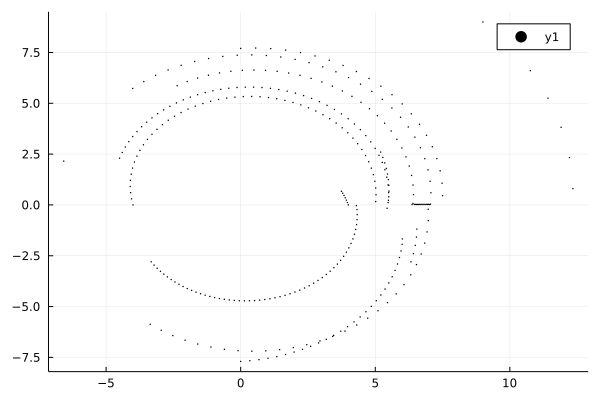

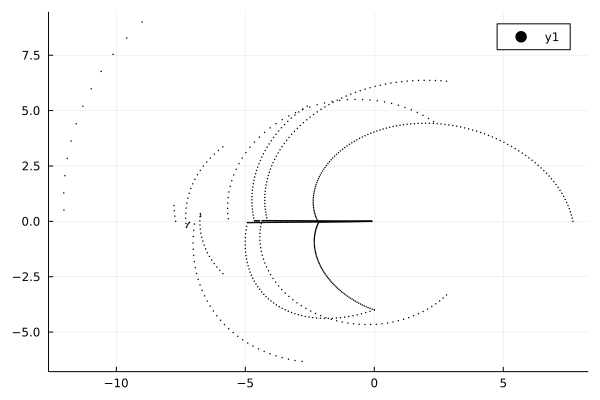

In [27]:
# Remove straight line data-points in dataP
cond1 = (dataP.yE .<= -0.05) .| (dataP.yE .>= 0.05)  # Keep this data which is away from x-axis
cond2 = (collect(1:length(dataP.yE))) .% 1 .== 0  # Keep this data which is index less than 2000
cond3 = (dataP.inputP .!= 0) # Keep the data only if input is nonzero
dataP = dataP[(cond1 .| cond2) .& cond3,:]
select!(dataP, [:xE, :yE, :thetaE ,:inputP])
display(scatter(dataP.xE, dataP.yE, markersize = 1, 
        color = :black, msc=:black, markershape = :circle))

# Remove straight line data-points in dataE
cond1 = (dataE.yP .<= -0.05) .| (dataE.yP .>= 0.05)  # Keep this data which is away from x-axis
cond2 = (collect(1:length(dataE.yP))) .% 1 .== 0  # Keep this data which is index less than 2000
cond3 = (dataE.inputE .!= 0) # Keep the data only if input is nonzero
dataE = dataE[(cond1 .| cond2) .& cond3,:]
select!(dataE, [:xP, :yP, :thetaP ,:inputE])
display(scatter(dataE.xP, dataE.yP, markersize = 1, 
        color = :black, msc=:black, markershape = :circle))

In [34]:
# This is the actual data-set
dubinsData = CSV.read("./twoCarsData.csv", DataFrame)
dataP = dubinsData[:, [:xP, :yP, :thetaP, :xE, :yE, :thetaE, :inputP]]
dataE = dubinsData[:, [:xP, :yP, :thetaP, :xE, :yE, :thetaE, :inputE]]
dataP.inputP = Int.(round.(dataP.inputP))
dataE.inputE = Int.(round.(dataE.inputE))

# Transform dataP to pursuer's frame of reference
N = length(dataP.inputP)
for i=1:N
    dataP.xE[i], dataP.yE[i], dataP.thetaE[i] = shift_rotate(dataP.xE[i], dataP.yE[i], dataP.thetaE[i], dataP.xP[i], dataP.yP[i], dataP.thetaP[i])
    dataP.xP[i] = 0
    dataP.yP[i] = 0
    dataP.thetaP[i] = 0
end

# Transform dataE to evader's frame of reference
for i=1:N
    dataE.xP[i], dataE.yP[i], dataE.thetaP[i] = shift_rotate(dataE.xP[i], dataE.yP[i], dataE.thetaP[i], dataE.xE[i], dataE.yE[i], dataE.thetaE[i])
    dataE.xE[i] = 0
    dataE.yE[i] = 0
    dataE.thetaE[i] = 0
end

,xP,yP,thetaP,xE,yE,thetaE,inputE
,Float64,Float64,Float64,Float64,Float64,Float64,Int64
1,-5.0,5.0,-1.5708,0.0,0.0,0.0,-1
2,-5.2033,4.7497,-1.46492,0.0,0.0,0.0,-1
3,-5.39024,4.49331,-1.35904,0.0,0.0,0.0,-1
4,-5.56075,4.23219,-1.25317,0.0,0.0,0.0,-1
5,-5.71491,3.96769,-1.14729,0.0,0.0,0.0,-1
6,-5.85289,3.70111,-1.04142,0.0,0.0,0.0,-1
7,-5.97502,3.43372,-0.935543,0.0,0.0,0.0,-1
8,-6.08172,3.16673,-0.829674,0.0,0.0,0.0,-1
9,-6.17352,2.90129,-0.72381,0.0,0.0,0.0,-1


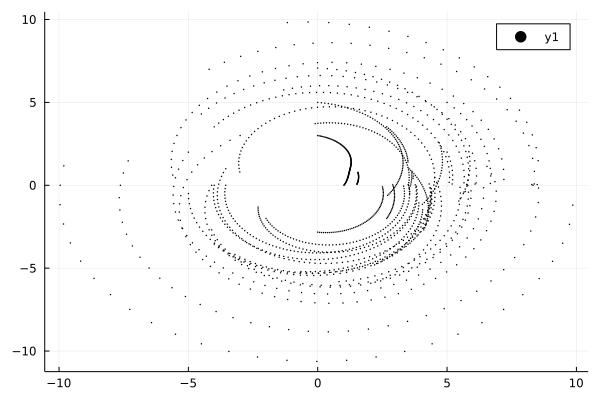

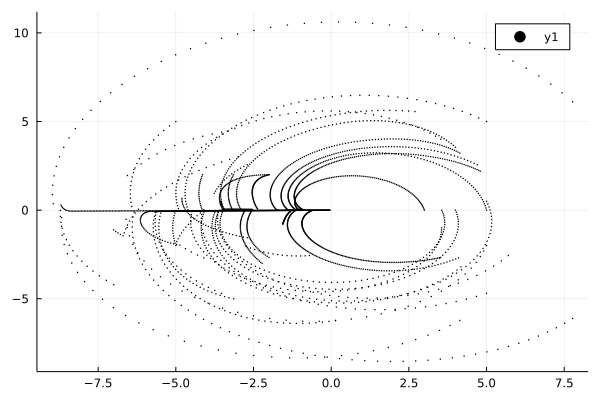

In [35]:
# Remove straight line data-points in dataP
cond1 = (dataP.yE .<= -0.05) .| (dataP.yE .>= 0.05)  # Keep this data which is away from x-axis
cond2 = (collect(1:length(dataP.yE))) .% 1 .== 0  # Keep this data which is index less than 2000
cond3 = (dataP.inputP .!= 0) # Keep the data only if input is nonzero
dataP = dataP[(cond1 .| cond2) .& cond3,:]
select!(dataP, [:xE, :yE, :thetaE ,:inputP])
display(scatter(dataP.xE, dataP.yE, markersize = 1, 
        color = :black, msc=:black, markershape = :circle))

# Remove straight line data-points in dataE
cond1 = (dataE.yP .<= -0.05) .| (dataE.yP .>= 0.05)  # Keep this data which is away from x-axis
cond2 = (collect(1:length(dataE.yP))) .% 1 .== 0  # Keep this data which is index less than 2000
cond3 = (dataE.inputE .!= 0) # Keep the data only if input is nonzero
dataE = dataE[(cond1 .| cond2) .& cond3,:]
select!(dataE, [:xP, :yP, :thetaP ,:inputE])
display(scatter(dataE.xP, dataE.yP, markersize = 1, 
        color = :black, msc=:black, markershape = :circle))

In [52]:
using ScikitLearn
using ScikitLearn.CrossValidation: train_test_split
@sk_import tree: DecisionTreeClassifier
@sk_import preprocessing: StandardScaler
@sk_import ensemble: RandomForestClassifier
@sk_import tree: export_graphviz
@sk_import metrics: accuracy_score

PyObject <function accuracy_score at 0x00000000A8630670>

## Pursuer Training

In [55]:
X_p = [dataP.xE dataP.yE dataP.thetaE]
y_p = dataP.inputP

# Split the data into test-train set
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size = 0.20)

# naming the classifier Pursuer
Pursuer = RandomForestClassifier(n_estimators = 100)
Pursuer.fit(X_train, y_train)



dot_data = export_graphviz(Pursuer.estimators_[99], 
                           #feature_names=wine.feature_names,
                           #class_names=wine.target_names, 
                           filled=true, impurity=true, 
                           rounded=true)
println(dot_data)

y_pred = Pursuer.predict(X_test)

println("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[2] <= -3.209\ngini = 0.47\nsamples = 844\nvalue = [812, 492]", fillcolor="#f5cdb1"] ;
1 [label="X[1] <= -1.231\ngini = 0.095\nsamples = 184\nvalue = [14, 266]", fillcolor="#43a2e6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 7\nvalue = [14, 0]", fillcolor="#e58139"] ;
1 -> 2 ;
3 [label="gini = 0.0\nsamples = 177\nvalue = [0, 266]", fillcolor="#399de5"] ;
1 -> 3 ;
4 [label="X[2] <= 1.342\ngini = 0.344\nsamples = 660\nvalue = [798, 226]", fillcolor="#eca571"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="X[2] <= -1.514\ngini = 0.429\nsamples = 469\nvalue = [498, 225]", fillcolor="#f1ba92"] ;
4 -> 5 ;
6 [label="X[1] <= 1.319\ngini = 0.495\nsamples = 154\nvalue = [133, 109]", fillcolor="#fae8db"] ;
5 -> 6 ;
7 [label="X[2] <= -2.309\ngini = 0.03\nsamples = 81\nvalue = [130,

## Evader Training

In [58]:
X_e = [dataE.xP dataE.yP dataE.thetaP]
y_e = dataE.inputE

# Split the data into test-train set
X_train, X_test, y_train, y_test = train_test_split(X_e, y_e, test_size = 0.20)

# naming the classifier Pursuer
Evader = RandomForestClassifier(n_estimators = 100)
Evader.fit(X_train, y_train)



dot_data = export_graphviz(Evader.estimators_[99], 
                           #feature_names=wine.feature_names,
                           #class_names=wine.target_names, 
                           filled=true, impurity=true, 
                           rounded=true)
println(dot_data)

y_pred = Evader.predict(X_test)

println("ACCURACY OF THE MODEL: ", accuracy_score(y_test, y_pred))

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="X[0] <= -5.015\ngini = 0.5\nsamples = 1658\nvalue = [1332, 1274]", fillcolor="#fefaf6"] ;
1 [label="X[0] <= -8.73\ngini = 0.467\nsamples = 182\nvalue = [105, 178]", fillcolor="#aed7f4"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 4\nvalue = [6, 0]", fillcolor="#e58139"] ;
1 -> 2 ;
3 [label="X[1] <= -0.168\ngini = 0.459\nsamples = 178\nvalue = [99, 178]", fillcolor="#a7d4f3"] ;
1 -> 3 ;
4 [label="X[1] <= -1.533\ngini = 0.219\nsamples = 94\nvalue = [18, 126]", fillcolor="#55abe9"] ;
3 -> 4 ;
5 [label="gini = 0.0\nsamples = 46\nvalue = [0, 76]", fillcolor="#399de5"] ;
4 -> 5 ;
6 [label="X[0] <= -5.761\ngini = 0.389\nsamples = 48\nvalue = [18, 50]", fillcolor="#80c0ee"] ;
4 -> 6 ;
7 [label="X[1] <= -1.145\ngini = 0.484\nsamples = 29\nvalue = [16, 23]", fillcolor="#c3e1f7"] ;
6 -> 7 ;
8 [label="X[1] <= -1.

}
ACCURACY OF THE MODEL: 0.9631901840490797


In [59]:
## Simulation of pursuit-evasion game

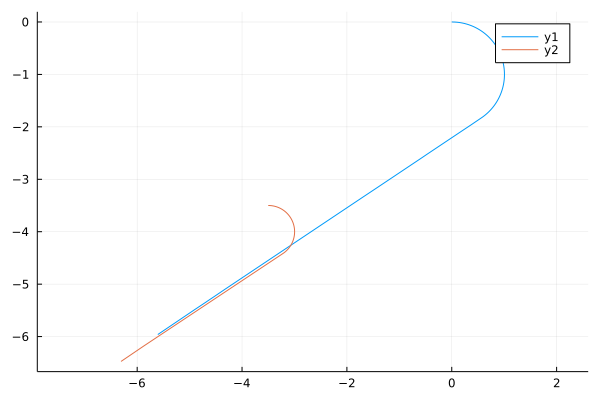

In [88]:
# Simulation using the learned model
dubins_dynP(x, u) = [cos(x[3]), sin(x[3]), u]
dubins_dynE(x, u) = [0.5*cos(x[3]), 0.5*sin(x[3]), u]


stateP0 = [0, 0, 0]
stateE0 = [-3.5, -3.5, 0.0]
n_iter = 1000
dt = 0.01

statesP = zeros(n_iter, 3)
inputP = zeros(n_iter)
statesE = zeros(n_iter, 3)
inputE = zeros(n_iter)

statesP[1,:] .= stateP0
statesE[1,:] .= stateE0
last_ind = 1

for i=1:n_iter-1
    sP = statesP[i, :]
    sE = statesE[i, :]

    sET = shift_rotate(sE[1], sE[2], sE[3], sP[1], sP[2], sP[3])
    uP = Pursuer.predict([sET[1] sET[2] sET[3]])
    statesP[i+1,:] .= statesP[i,:] .+ dt*dubins_dynP(statesP[i,:], uP[1])

    sPT = shift_rotate(sP[1], sP[2], sP[3], sE[1], sE[2], sE[3])
    uE = Evader.predict([sPT[1] sPT[2] sPT[3]])[1]
    statesE[i+1,:] .= statesE[i,:] .+ dt*dubins_dynE(statesE[i,:], uE[1])

    last_ind = i
    if norm(sP[1:2] - sE[1:2]) < 0.1
        println("Captured!!")
        break
    end
end

return statesP, statesE
fig1 = plot(statesP[1:last_ind,1], statesP[1:last_ind,2], aspect_ratio = 1)
plot!(fig1,statesE[1:last_ind,1], statesE[1:last_ind,2], aspect_ratio = 1)